In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import lane_detection
import lane_following

In [8]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

frequency = 300
count = 0


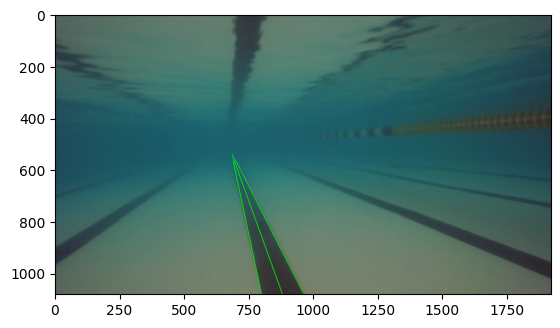

In [9]:

    if i % freq == 0:
        c = img.shape[0]/2
        temp = img.copy()[int(img.shape[0]/2):]
        lines = lane_detection.detect_lines(temp, threshold1=50,threshold2=50, apertureSize=3,maxLineGap = 200, minLineLength=50)
        lanes = lane_detection.detect_lanes(lines, temp.shape[0])
        drawing = lane_detection.draw_lanes(temp, lanes)
        
        center = lane_following.get_lane_center(lanes)
        cen = lane_following.get_center_line(center[0], center[1], temp.shape[0])
        firstHalf = img.copy()[:int(img.shape[0]/2)]
        secondHalf = lane_following.draw_center(drawing, cen)
        full = np.concatenate((firstHalf, secondHalf), axis=0)
        colorImg = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

        plt.imshow(colorImg)
        plt.show()
        # mid = lane_following.get_lane_center(lanes)

        # direction = lane_following.recommend_direction(mid[0], mid[1], c)
        # print (direction)

    i += 1